# OPTaaS Multi-Objective

### <span style="color:red">Note:</span> To run this notebook, you need an API Key. You can get one <a href="mailto:charles.brecque@mindfoundry.ai">here</a>.

OPTaaS can optimize multiple objectives within a single Task. Your scoring function should return a dictionary of scores for each objective. You can also optionally return a dictionary of variances for each objective (i.e. return a tuple of dictionaries).

Please note: `ChoiceParameters` and any parameter with `optional=True` are not currently supported for multi-objective tasks.

## Define your parameters and objectives
We will use [this multi-objective optimization example](https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/dtlz2/index.php#Formulation):

In [1]:
import math

from mindfoundry.optaas.client.parameter import FloatParameter
from mindfoundry.optaas.client.objective import Objective
from mindfoundry.optaas.client.goal import Goal

parameters=[
    FloatParameter('x1', minimum=0, maximum=1),
    FloatParameter('x2', minimum=0, maximum=1)
]

objectives = [
    Objective("f1", goal=Goal.max),  # or goal=Goal.min as appropriate
    Objective("f2", goal=Goal.max)   # you can also specify known_min_score and known_max_score
]

def scoring_function(x1, x2):
    g = ((x1 - 0.5) ** 2) + ((x2 - 0.5) ** 2)
    x1_pi2 = x1 * math.pi / 2
    f1 = ((1 + g) * math.cos(x1_pi2))
    f2 = ((1 + g) * math.sin(x1_pi2))
    return {"f1": f1, "f2": f2}

## Connect to OPTaaS using your API Key

In [2]:
from mindfoundry.optaas.client.client import OPTaaSClient

client = OPTaaSClient('https://optaas.mindfoundry.ai', '<Your OPTaaS API key>')

## Create your Task

In [3]:
task = client.create_task(
    title='Multi-objective Example',
    parameters=parameters,
    objectives=objectives,
    initial_configurations=4
)

## Run your Task
At the end we will retrieve the set of Pareto front Results. These are the Results where, for each objective, the score cannot be improved without reducing the score for another objective.

In [4]:
pareto_set = task.run(scoring_function, max_iterations=30)

Running task "Multi-objective Example" for 30 iterations

Iteration: 0    Score: {'f1': 0.7071067811865476, 'f2': 0.7071067811865475}
Configuration: {'x1': 0.5, 'x2': 0.5}

Iteration: 1    Score: {'f1': 1.0393644740751975, 'f2': 0.430518861410726}
Configuration: {'x1': 0.25, 'x2': 0.75}

Iteration: 2    Score: {'f1': 0.43051886141072604, 'f2': 1.0393644740751975}
Configuration: {'x1': 0.75, 'x2': 0.25}

Iteration: 3    Score: {'f1': 0.8574530376869998, 'f2': 0.5729318028014647}
Configuration: {'x1': 0.375, 'x2': 0.375}

Iteration: 4    Score: {'f1': 4.118843994562698e-08, 'f2': 1.311068760938587}
Configuration: {'x1': 0.99999998, 'x2': 0.7471209844157051}

Iteration: 5    Score: {'f1': 0.09592193816780585, 'f2': 1.4567384014126048}
Configuration: {'x1': 0.9581408891314421, 'x2': 0.0}

Iteration: 6    Score: {'f1': 1.1752659197219903, 'f2': 0.5522576509385636}
Configuration: {'x1': 0.2796537691999611, 'x2': 0.0}

Iteration: 7    Score: {'f1': 0.4164848656933371, 'f2': 1.2727990678700287

## Plot your results

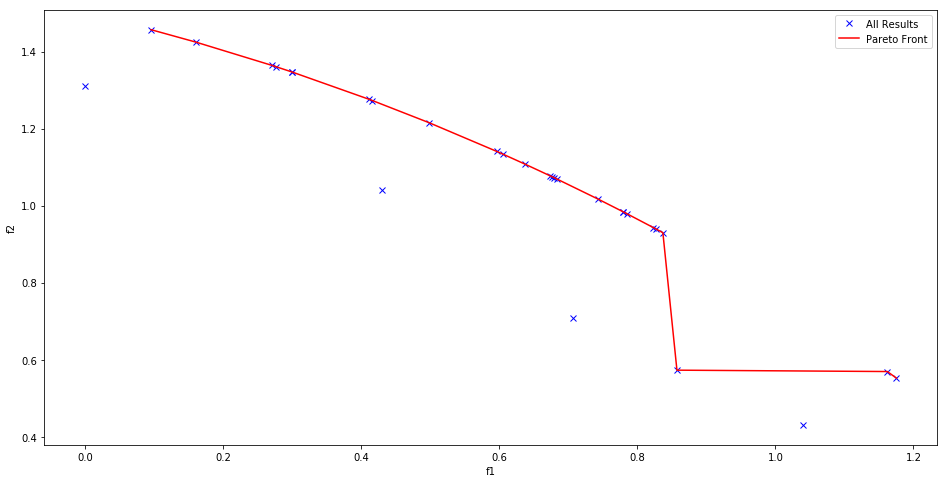

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

all_results = task.get_results()
all_f1_scores = [result.score['f1'] for result in all_results]
all_f2_scores = [result.score['f2'] for result in all_results]

ordered_pareto_set = sorted(pareto_set, key=lambda result: result.score['f1'])
pareto_f1_scores = [result.score['f1'] for result in ordered_pareto_set]
pareto_f2_scores = [result.score['f2'] for result in ordered_pareto_set]

plt.figure(figsize=(16,8))
plt.plot(all_f1_scores, all_f2_scores, 'xb', label='All Results')
plt.plot(pareto_f1_scores, pareto_f2_scores, 'r', label='Pareto Front')
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()
plt.show()

## Plot the domain space

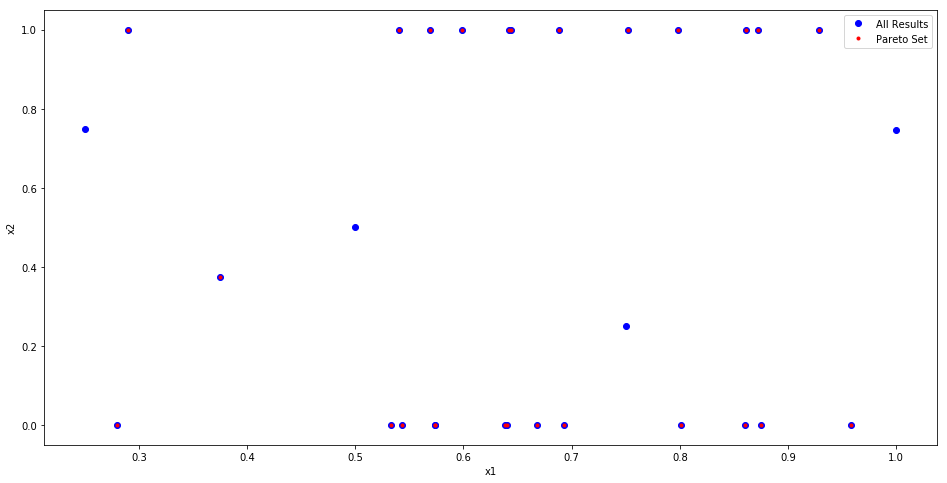

In [14]:
all_x1_values = [result.configuration.values['x1'] for result in all_results]
all_x2_values = [result.configuration.values['x2'] for result in all_results]

pareto_x1_values = [result.configuration.values['x1'] for result in pareto_set]
pareto_x2_values = [result.configuration.values['x2'] for result in pareto_set]

plt.figure(figsize=(16,8))
plt.plot(all_x1_values, all_x2_values, 'ob', label='All Results')
plt.plot(pareto_x1_values, pareto_x2_values, '.r', label='Pareto Set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()